In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..")  # Adds the repo to the path.
sys.path.insert(0,"../..")
#from datasets.XRay import JointDataset
import datasets
import datasets.xray
import json
import collections
import numpy as np
import h5py
import ntpath
import matplotlib.pyplot as plt
sys.path.insert(0,"../../../torchxrayvision")
import torchxrayvision as xrv

In [18]:
!mkdir $SLURM_TMPDIR/NIH/
!rsync /lustre04/scratch/cohenjos/NIH/images-224.tar $SLURM_TMPDIR/NIH/images-224.tar
!cd $SLURM_TMPDIR/NIH/; tar xf images-224.tar

In [21]:
!echo $SLURM_TMPDIR

/localscratch/cohenjos.10222373.0


In [23]:
d_nih = xrv.datasets.NIH_Dataset(#imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/ChestXray-NIHCC/images",
                                 #imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                 imgpath="/localscratch/cohenjos.10222373.0/NIH/images-224",
                                views=["PA","AP"], unique_patients=False)


In [24]:
xrv.datasets.default_pathologies 

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [25]:
xrv.datasets.relabel_dataset(["Cardiomegaly"], d_nih)

{'Fibrosis', 'Hernia', 'Infiltration', 'Nodule', 'Pneumothorax', 'Effusion', 'Consolidation', 'Emphysema', 'Mass', 'Pleural_Thickening', 'Pneumonia', 'Atelectasis', 'Edema'} will be dropped


In [26]:
sample = d_nih[0]

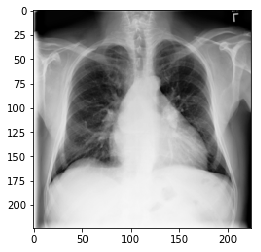

In [27]:
plt.imshow(sample["img"][0], cmap="Greys_r");

In [28]:
d_nih.labels.shape

(112120, 1)

In [29]:
textnih = datasets.xray.XRayDatasetTextDataset(d_nih)

In [30]:
sample, seg, labs = textnih[0]

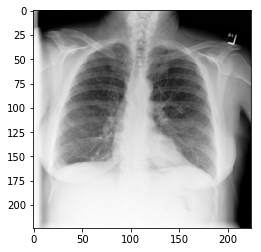

In [31]:
plt.imshow(sample[0], cmap="Greys_r");

In [32]:
labs

0.0

In [62]:
def get_label_images(d):
    np.random.seed(10)
    site_0 = np.where(d.labels == 0)[0]
    site_1 = np.where(d.labels == 1)[0]

    img_0 = np.zeros((224, 224))
    img_1 = np.zeros((224, 224))

    np.random.shuffle(site_0)
    for i, idx in enumerate(site_0):
        e = d[idx]
        img_0 += e[0][0].numpy()
        break
    np.random.shuffle(site_1)
    for i, idx in enumerate(site_1):
        e = d[idx]
        img_1 += e[0][0].numpy()
        break
    
    return (img_0, img_1)

In [63]:
train_0, train_1 = get_label_images(datasets.xray.XRayDatasetTextDataset(d_nih, mode="train"))
valid_0, valid_1 = get_label_images(datasets.xray.XRayDatasetTextDataset(d_nih, mode="valid"))

Text(0.5, 1.0, 'valid label 1')

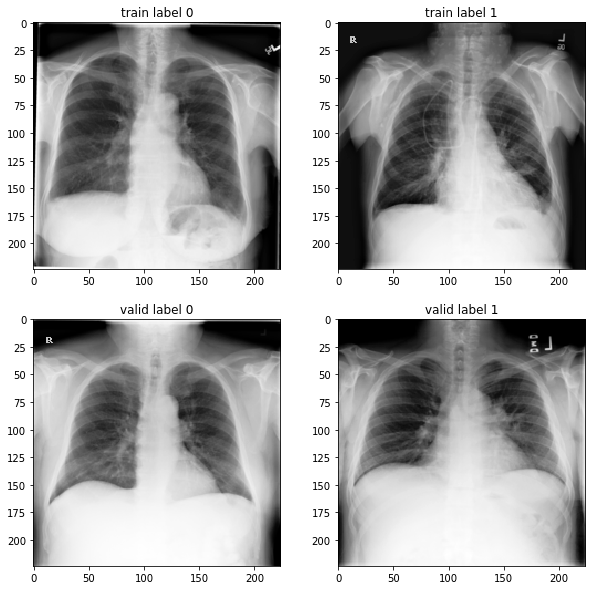

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2)

ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('train label 0')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('train label 1')
ax3.imshow(valid_0, cmap="Greys_r")
ax3.set_title('valid label 0')
ax4.imshow(valid_1, cmap="Greys_r")
ax4.set_title('valid label 1')